# Import the Data from Kaggle to Google Drive and then load them to Google Collab

# 1. Understand Business Context
Brainstorm with your group to define what you want to explore. Do you have a research question or a theory? Identify the 'business problem' you're addressing.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [ ]:
%cd /content/drive/MyDrive/Kaggle

/content/drive/MyDrive/Kaggle


In [ ]:
!kaggle datasets download -d kiva/data-science-for-good-kiva-crowdfunding --force --unzip

Dataset URL: https://www.kaggle.com/datasets/kiva/data-science-for-good-kiva-crowdfunding
License(s): CC0-1.0
 86% 36.0M/41.9M [00:00<00:00, 50.1MB/s]
100% 41.9M/41.9M [00:00<00:00, 46.6MB/s]


In [ ]:
import pandas as pd
df_kiva_loans = pd.read_csv('/content/drive/MyDrive/Kaggle/kiva_loans.csv')
df_mpi_region_locations = pd.read_csv('/content/drive/MyDrive/Kaggle/kiva_mpi_region_locations.csv')
df_loans_themes_ids = pd.read_csv('/content/drive/MyDrive/Kaggle/loan_theme_ids.csv')
df_loan_themes_by_region = pd.read_csv('/content/drive/MyDrive/Kaggle/loan_themes_by_region.csv')


In [ ]:
df_kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [ ]:
list(df_kiva_loans.columns)

['id',
 'funded_amount',
 'loan_amount',
 'activity',
 'sector',
 'use',
 'country_code',
 'country',
 'region',
 'currency',
 'partner_id',
 'posted_time',
 'disbursed_time',
 'funded_time',
 'term_in_months',
 'lender_count',
 'tags',
 'borrower_genders',
 'repayment_interval',
 'date']

In [ ]:
df_loan_themes_by_region.head()

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


In [ ]:
list(df_loan_themes_by_region.columns)

['Partner ID',
 'Field Partner Name',
 'sector',
 'Loan Theme ID',
 'Loan Theme Type',
 'country',
 'forkiva',
 'region',
 'geocode_old',
 'ISO',
 'number',
 'amount',
 'LocationName',
 'geocode',
 'names',
 'geo',
 'lat',
 'lon',
 'mpi_region',
 'mpi_geo',
 'rural_pct']

In [ ]:
df_loans_themes_ids.head()

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0
3,641019,a1050000002X1ij,Higher Education,160.0
4,641594,a1050000002VbsW,Subsistence Agriculture,336.0


In [ ]:
df_mpi_region_locations.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


# 2. Data Cleaning and Manipulation
Assess the dataset for quality issues and fix missing values, outliers, and data type inconsistencies.
Perform necessary transformations, create new variables, and normalize data if appropriate.
If needed, merge data from multiple sources using appropriate joins.
Summarize data using groupby to calculate relevant statistics (e.g., sums, averages).


In [ ]:
df_kiva_loans.isnull().sum()


,0
id,0
funded_amount,0
loan_amount,0
activity,0
sector,0
use,4232
country_code,8
country,0
region,56800
currency,0


In [ ]:
#drop columns that will not be used
df_kiva_loans = df_kiva_loans.drop(['use', 'disbursed_time','funded_time','posted_time','tags'], axis=1)


In [ ]:
df_kiva_loans.isnull().sum()


,0
id,0
funded_amount,0
loan_amount,0
activity,0
sector,0
country_code,8
country,0
region,56800
currency,0
partner_id,13507


In [ ]:
#drop nas on specific columns not all of them, it doesnt affect the task we actually want to do now, but might need for later use
df_kiva_loans.dropna(subset=['partner_id','borrower_genders'], inplace=True)

In [ ]:
df_kiva_loans.isnull().sum()


,0
id,0
funded_amount,0
loan_amount,0
activity,0
sector,0
country_code,8
country,0
region,39491
currency,0
partner_id,0


In [ ]:
df_kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653896 entries, 0 to 671204
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  653896 non-null  int64  
 1   funded_amount       653896 non-null  float64
 2   loan_amount         653896 non-null  float64
 3   activity            653896 non-null  object 
 4   sector              653896 non-null  object 
 5   country_code        653888 non-null  object 
 6   country             653896 non-null  object 
 7   region              614405 non-null  object 
 8   currency            653896 non-null  object 
 9   partner_id          653896 non-null  float64
 10  term_in_months      653896 non-null  float64
 11  lender_count        653896 non-null  int64  
 12  borrower_genders    653896 non-null  object 
 13  repayment_interval  653896 non-null  object 
 14  date                653896 non-null  object 
dtypes: float64(4), int64(2), object(9)
memo

# Remove Outliers

In [ ]:
# Calculate Z-scores
z_scores = zscore(df_kiva_loans['funded_amount'])

# Get boolean array indicating the presence of outliers
df_kiva_loans['outlier_funded_amount'] = (z_scores > 3) | (z_scores < -3)



In [ ]:
df_kiva_loans['outlier_funded_amount'].sum()

14269

In [ ]:
df_kiva_loans_cleaned = df_kiva_loans[~df_kiva_loans['outlier_funded_amount']]

In [ ]:
df_kiva_loans_cleaned['outlier_funded_amount'].sum()

0

In [ ]:
print("We saved ", len(df_kiva_loans_cleaned)/len(df_kiva_loans)*100, "% of the data")

We saved  97.81784870988659 % of the data


In [ ]:
#Grouping by 'repayment interval' and calculating  mean,sum and max for funded amount and loan amount.

df_kiva_loans_cleaned.groupby(['country'])[['funded_amount']].agg(['mean', 'sum', 'max','median'])

funded_amount                            
                    mean         sum     max  median
country                                             
Albania      1262.826200   2419575.0  2975.0  1175.0
Armenia      1289.216825  11095000.0  3900.0  1150.0
Azerbaijan   1369.479495   2604750.0  3000.0  1300.0
Belize        910.365854    111975.0  2975.0   625.0
Benin         840.890269    406150.0  3850.0   625.0
...                  ...         ...     ...     ...
Vanuatu      2312.500000      9250.0  3350.0  2262.5
Vietnam      1204.835381  12844750.0  3950.0   900.0
Yemen         726.177497   1665125.0  3725.0   625.0
Zambia       1294.972261    933675.0  3950.0   950.0
Zimbabwe      818.037018   3248425.0  3800.0   500.0

[80 rows x 4 columns]

In [ ]:
#Grouping by 'sector' and calculating mean,sum and max for funded amount.

df_kiva_loans_cleaned.groupby(['sector'])[['funded_amount']].agg(['mean', 'sum', 'max','median'])

funded_amount                            
                        mean          sum     max median
sector                                                  
Agriculture       677.392159  118656075.0  3950.0  500.0
Arts              715.980383    7920175.0  3950.0  450.0
Clothing          818.760916   23907000.0  3950.0  550.0
Construction      824.144275    4815475.0  3950.0  650.0
Education         877.021974   26501850.0  3950.0  675.0
Entertainment     867.256289     551575.0  3925.0  625.0
Food              658.389658   84844700.0  3950.0  425.0
Health            847.614428    7425950.0  3900.0  650.0
Housing           612.962242   20471100.0  3925.0  475.0
Manufacturing     745.258477    4483475.0  3950.0  500.0
Personal Use      370.623408   13388400.0  3950.0  200.0
Retail            592.441733   70080525.0  3950.0  400.0
Services          760.519532   30682400.0  3950.0  500.0
Transportation    578.867156    8745525.0  3925.0  425.0
Wholesale        1052.058824     625975.0  3950.0  875.0

In [ ]:
#Grouping by 'repayment interval' and calculating  mean,sum and max for funded amount and loan amount.

df_kiva_loans_cleaned.groupby(['repayment_interval'])[['funded_amount',]].agg(['mean', 'sum', 'max','median'])

funded_amount                            
                            mean          sum     max median
repayment_interval                                          
bullet                658.100588   43992050.0  3950.0  500.0
irregular             530.496538  129937700.0  3950.0  325.0
monthly               760.027483  249170450.0  3950.0  550.0

# 3. Descriptive Statistics
Calculate basic statistics for key variables (mean, median, variance, etc.).
Explore data distributions with histograms, box plots, and density plots.


In [ ]:
df_kiva_loans_cleaned.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.396270e+05,639627.000000,639627.000000,639627.000000,639627.000000,639627.000000
mean,9.923218e+05,661.479581,705.903362,179.000644,13.758570,18.313573
std,1.976908e+05,635.703114,683.253966,93.961519,8.230026,18.069642
min,6.530470e+05,0.000000,25.000000,9.000000,2.000000,0.000000
25%,8.213955e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.879920e+05,450.000000,475.000000,145.000000,13.000000,12.000000
75%,1.166662e+06,850.000000,925.000000,204.000000,14.000000,23.000000
max,1.340339e+06,3950.000000,30000.000000,533.000000,145.000000,155.000000


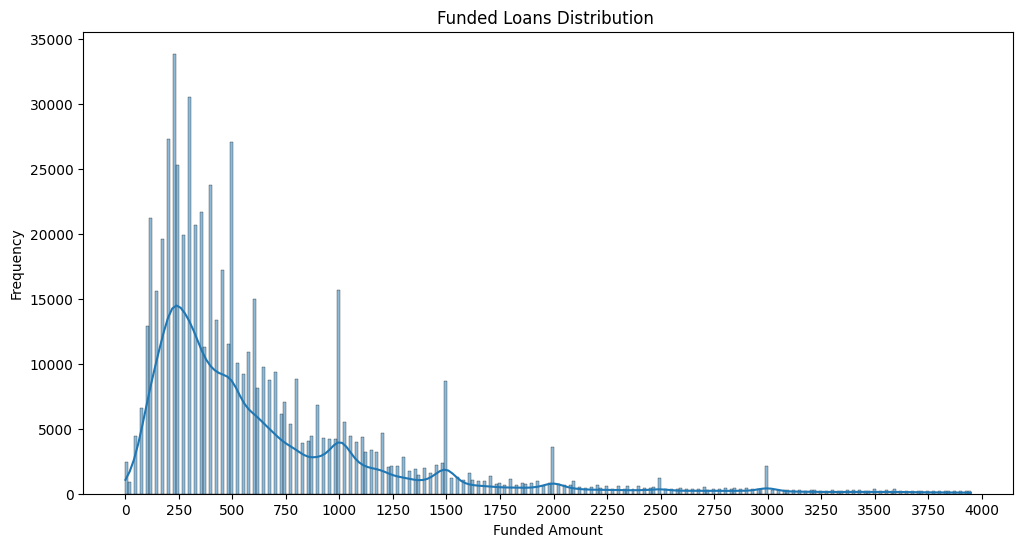

In [ ]:
#Another useful adjustment option;
plt.figure(figsize=(12, 6))

# Driver Age Distribution
sns.histplot(df_kiva_loans_cleaned['funded_amount'], kde=True)
plt.title('Funded Loans Distribution ')


#Alternatively:
plt.locator_params(axis='x', nbins=20)



plt.xlabel('Funded Amount')
plt.ylabel('Frequency')
plt.show()

In [ ]:
country_counts = df_kiva_loans_cleaned['country'].value_counts()
print("Country that got Funds:\n", country_counts)

Country that got Funds:
 country
Philippines                         160333
Kenya                                66882
El Salvador                          39321
Cambodia                             34796
Pakistan                             26846
                                     ...  
Saint Vincent and the Grenadines        12
Chile                                    4
Vanuatu                                  4
Congo                                    3
Namibia                                  3
Name: count, Length: 80, dtype: int64


In [ ]:
country_funded_amount=df_kiva_loans_cleaned.groupby(['country'])[['funded_amount',]].sum().sort_values(by='funded_amount', ascending=False)
print("Summarized Funds per Country:\n", country_funded_amount)

Summarized Funds per Country:
                                   funded_amount
country                                        
Philippines                          54267125.0
Kenya                                28636375.0
El Salvador                          23060625.0
Peru                                 21319075.0
Cambodia                             18689125.0
...                                         ...
Saint Vincent and the Grenadines        33225.0
Chile                                   13100.0
Namibia                                  9975.0
Vanuatu                                  9250.0
Congo                                    8175.0

[80 rows x 1 columns]


In [ ]:
repayment_interval_counts = df_kiva_loans_cleaned['repayment_interval'].value_counts()
print("Repayment Interval Counts:\n", repayment_interval_counts)

Repayment Interval Counts:
 repayment_interval
monthly      327844
irregular    244936
bullet        66847
Name: count, dtype: int64


#Mean, median and stuff like that

# 4. Exploratory Data Analysis (EDA) and Visualization
Conduct thorough EDA of your chosen dataset.
Create insightful visualizations—avoid trivial visuals like pie charts. Focus on revealing key insights.

# Univariate Analysis

Which are the Top 10 Countries in terms of Loans?

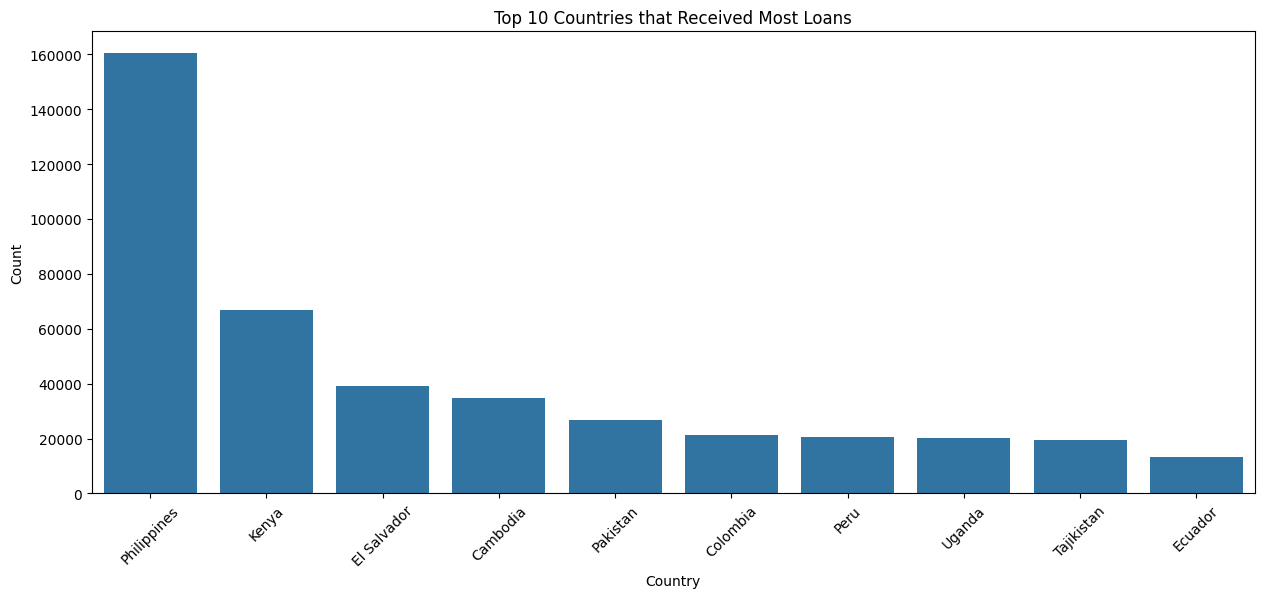

In [ ]:

# Since the count of countries is big i chose to Calculate only the top 10 countries that received loans
top_10_countries = df_kiva_loans_cleaned['country'].value_counts().nlargest(10).index

plt.figure(figsize=(15, 6))
sns.countplot(x='country', data=df_kiva_loans_cleaned, order=top_10_countries)
plt.title('Top 10 Countries that Received Most Loans')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

But which are the Top 10 Countries in terms of Funded Amount?

In [ ]:
#Create a new df with the sum of funded amounts per country
df_country_funded_amount=df_kiva_loans_cleaned.groupby(['country'])[['funded_amount']].sum().sort_values(by='funded_amount', ascending=False)
df_country_funded_amount.head(2)

,funded_amount
country,
Philippines,54267125.0
Kenya,28636375.0


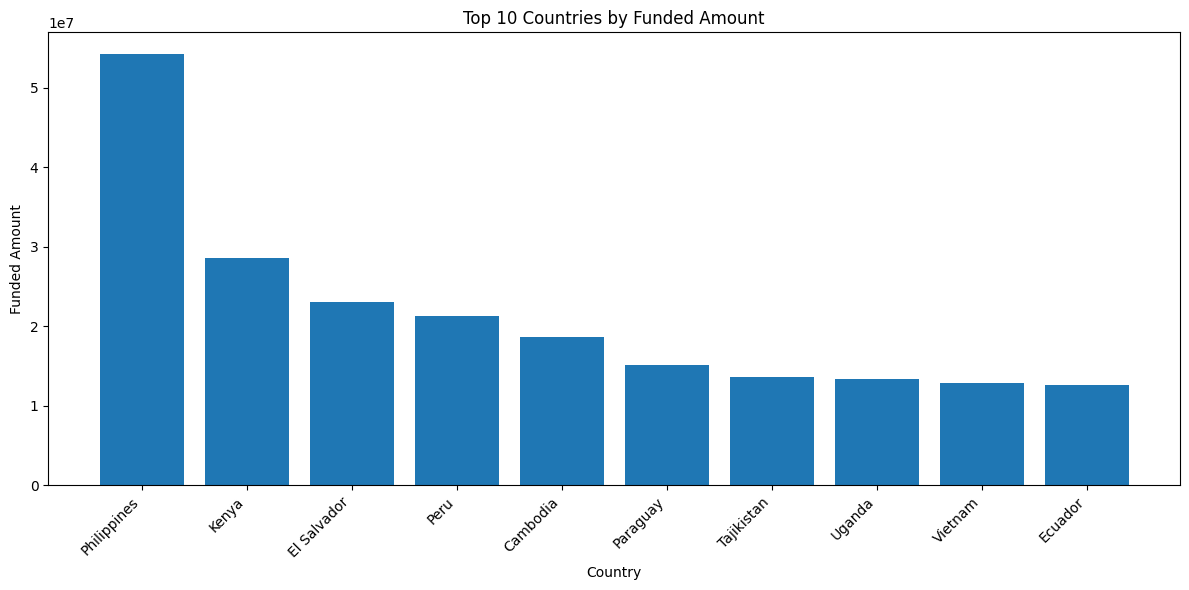

In [ ]:
# Select the top 10 countries
top_10_countries = df_country_funded_amount.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_10_countries.index, top_10_countries['funded_amount'])
plt.title('Top 10 Countries by Funded Amount')
plt.xlabel('Country')
plt.ylabel('Funded Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


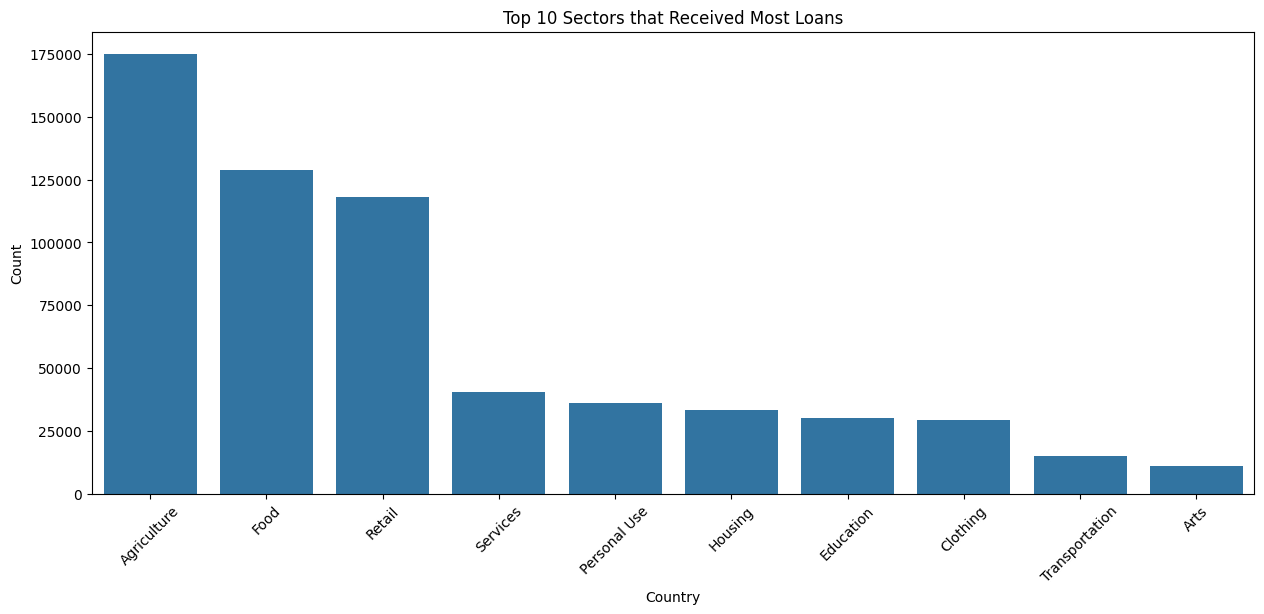

In [ ]:
#Distirbution loans in each Sector
top_10_sectors = df_kiva_loans_cleaned['sector'].value_counts().nlargest(10).index

plt.figure(figsize=(15, 6))
sns.countplot(x='sector', data=df_kiva_loans_cleaned, order=top_10_sectors)
plt.title('Top 10 Sectors that Received Most Loans')
plt.xticks(rotation=45)  # Rotates x-axis labels for better readability
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

But which are the  Sectors in terms of Funded Amount?

In [ ]:
#Create a new df with the sum of funded amounts per sector
df_sector_funded_amount=df_kiva_loans_cleaned.groupby(['sector'])[['funded_amount']].sum().sort_values(by='funded_amount', ascending=False)
df_sector_funded_amount.head(2)

,funded_amount
sector,
Agriculture,118656075.0
Food,84844700.0


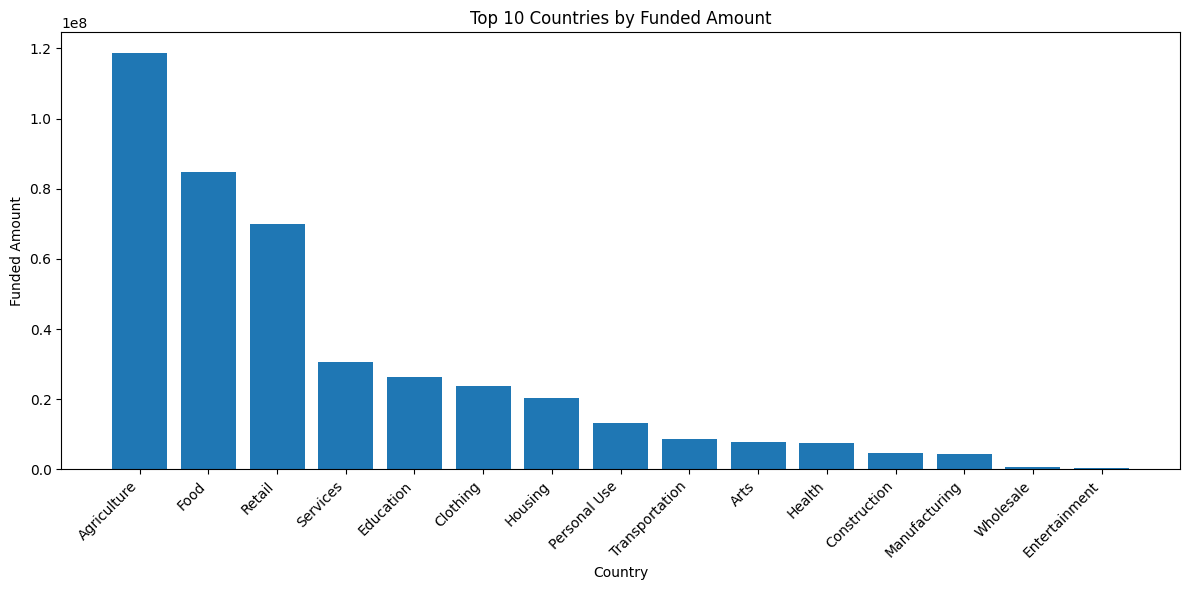

In [ ]:
# Select the top 10 sectors


# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(df_sector_funded_amount.index, df_sector_funded_amount['funded_amount'])
plt.title('Top 10 Countries by Funded Amount')
plt.xlabel('Country')
plt.ylabel('Funded Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


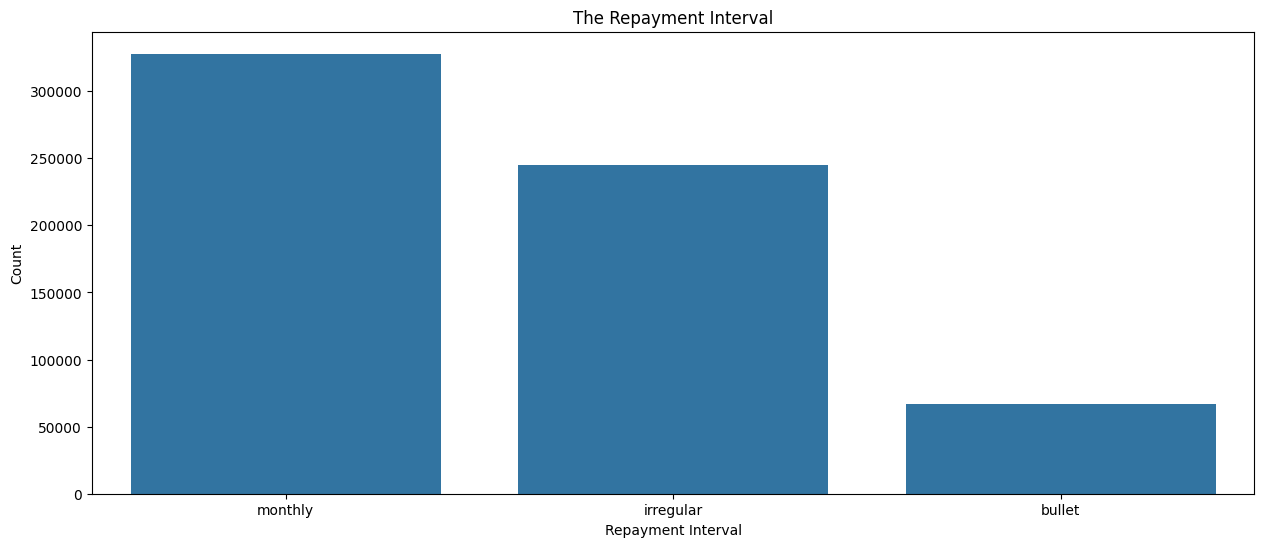

In [ ]:
#Distirbution of Repayment interval
plt.figure(figsize=(15, 6))
sns.countplot(x='repayment_interval',order=df_kiva_loans_cleaned['repayment_interval'].value_counts().index ,data=df_kiva_loans_cleaned)
plt.title('The Repayment Interval')
plt.xlabel('Repayment Interval')
plt.ylabel('Count')
plt.show()

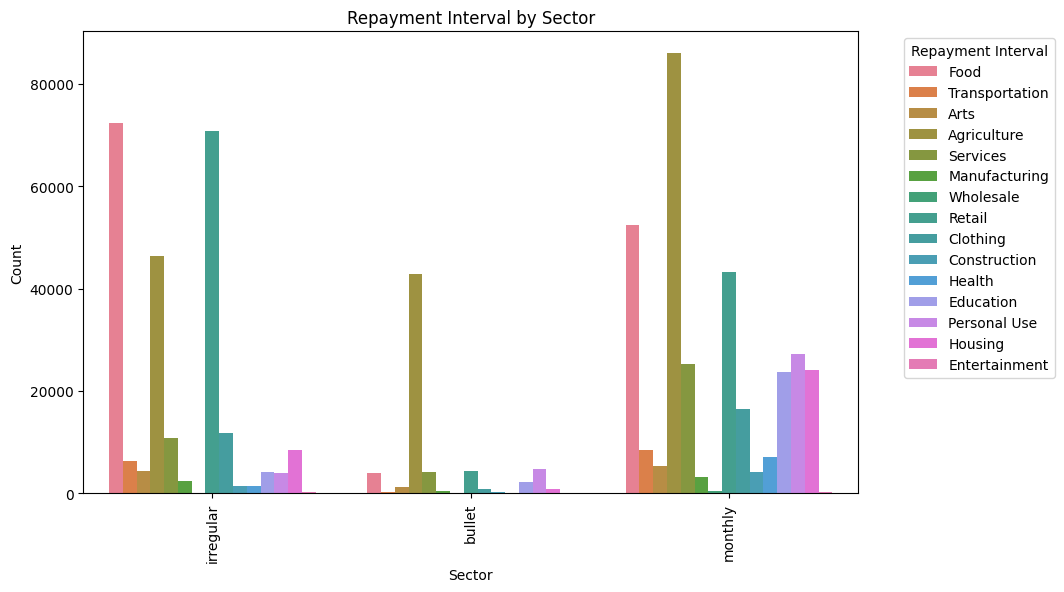

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='repayment_interval', hue='sector', data=df_kiva_loans_cleaned)
plt.title('Repayment Interval by Sector')
plt.xlabel('Sector')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='Repayment Interval', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#Bivariate Analysis

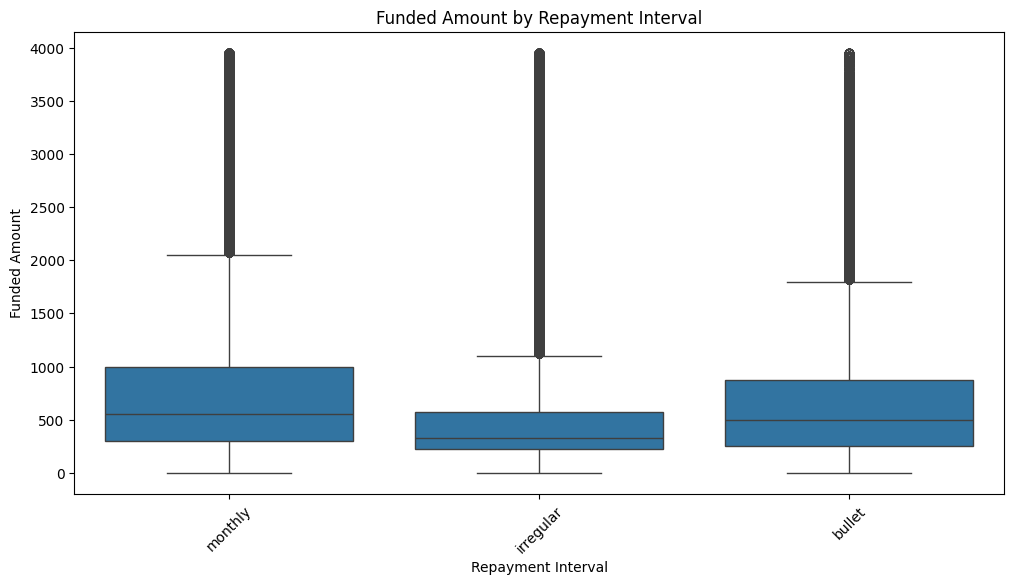

In [ ]:
# Funded Amount vs. Repayment Interval
plt.figure(figsize=(12, 6))
sns.boxplot(x='repayment_interval', y='funded_amount', data=df_kiva_loans_cleaned, order=df_kiva_loans_cleaned['repayment_interval'].value_counts().index)
plt.title('Funded Amount by Repayment Interval')
plt.xlabel('Repayment Interval')
plt.ylabel('Funded Amount')
plt.xticks(rotation=45)
plt.show()

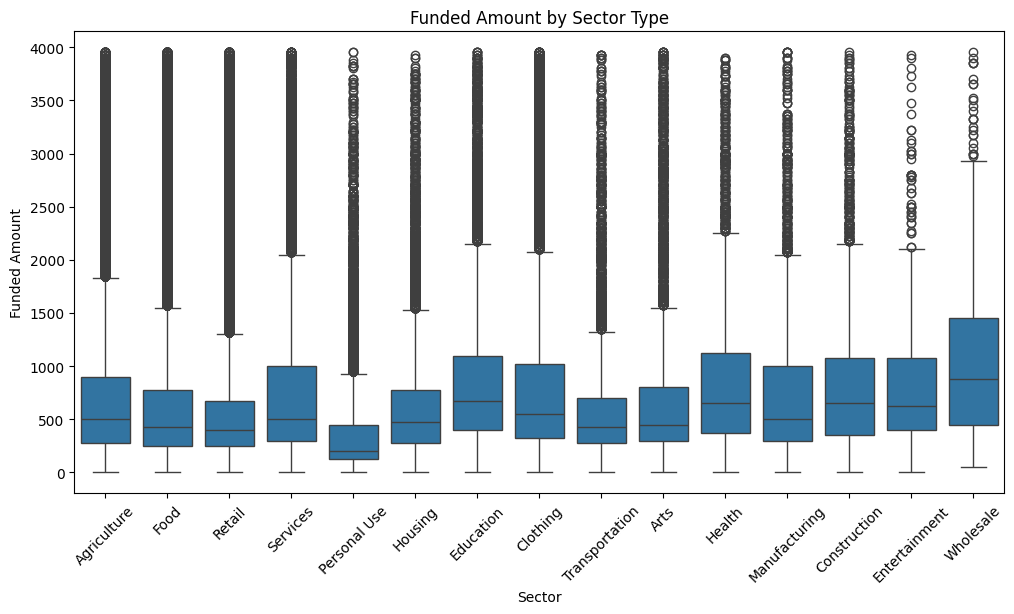

In [ ]:
# Funded Amount vs. Sector
plt.figure(figsize=(12, 6))
sns.boxplot(x='sector', y='funded_amount', data=df_kiva_loans_cleaned, order=df_kiva_loans_cleaned['sector'].value_counts().index)
plt.title('Funded Amount by Sector Type')
plt.xlabel('Sector')
plt.ylabel('Funded Amount')
plt.xticks(rotation=45)
plt.show()